(section:regression)=
# Lineare Regression

Hier betrachten wir folgende Situation: Es liegt eine 2-dimensionale Stichprobe zweier metrischer Merkmale vor

$$ (x_1,y_1), (x_2,y_2), \dots, (x_n,y_n) $$

Diese lassen sich als Punkte in einem 2-dimensionalen Streudiagramm plotten. Wir fragen uns nun welche Gerade approximiert diese Punkte am besten? Dabei sind 2 Fragen zu klären:

1. Was bedeutet "approximiert ... am besten"?

2. Wie finden wir eine solche /diese  Gerade?

## Kleine Quadrate

Gute Approximation der Punkte durch eine Gerade soll bedeuten, dass die vertikalen Abstände der Gerade zu den Punkten möglichst klein sein sollen. Schauen wir uns in einer Grafik an was da bedeutet:


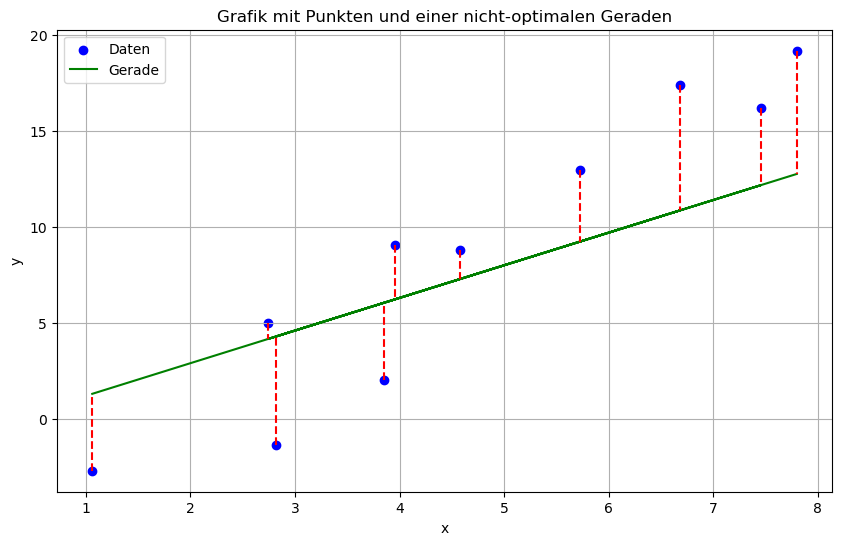

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generiere 10 zufällige Punkte
np.random.seed(124)
x = np.random.rand(10) * 10
y = 2 * x + np.random.randn(10) * 5

# Definiere eine Gerade mit falscher Steigung (z.B. Steigung = 1)
m = 1.7  # Falsche Steigung
b = -0.50  # y-Achsenabschnitt

# Berechne die y-Werte der Geraden
y_line = m * x + b

# Erstelle die Grafik
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Daten')
plt.plot(x, y_line, color='green', label='Gerade')

# Zeichne die vertikalen Abstände zwischen den Punkten und der Geraden
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_line[i]], color='red', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafik mit Punkten und einer nicht-optimalen Geraden')
plt.legend()
plt.grid(True)
plt.show()

Wir erkennen: Wenn die gerade etwas steiler wäre, würde viele der roten Linien kürzer sein. Die Gerade würde dann besser zu den Daten passen. Da wir wollen das *alle* roten Linie möglichst kurz sind, brauchen wir ein Kriterium, das *alle gleichzeit* betrachtet. Dieses lautet wie folgt:  

*Die Summe der Quadrate der Längen der roten Linien soll minimal sein*

In der nächsten Definition schreiben wir dies als Formel auf und definieren so die **Regressionsgerade**.


:::{admonition} Definition
:class: defintion

Es seien die Punkte $ (x_1,y_1), (x_2,y_2), \dots, (x_n,y_n) $ gegeben. Sind $m$ und $n$ so gewählt, dass

$$ \sum_{i=1}^n (y_i - (m x_i + n))^2 $$

minimal ist, nennen wir die Gerade $y=mx+n$ **Regressionsgerade** (oder **Ausgleichsgerade** oder **Trendlinie**) zu den Datenpunkten.

:::

Schauen wir uns noch einmal die Geradengleichung an: $y=mx+n$. 
Hier ist $y$ eine Funktion von $x$. Anders ausgedrückt, $y$ hängt von $x$ ab. In der Statistik sagt man dann auch $y$ wird durch $x$ erklärt. Dementsprechend verwendet man die Bezeichnungen:

- $y$ ... Zielvariable / zu erklärende Variable / abhängige Variable
- $x$ ... Regressor / erklärende Variable / unabhängige Variable

---

Mathematisch gesehen ist das suchen einer Regressionsgeraden ein Optimierungsproblem. Es ist eine Funktion zu minimieren, die von 2 Variablen ($m$ und $n$) abhängt.

Bevor wir uns ansehen, wie die Lösungs dieses Optimierungsproblems aussieht, schauen wir uns das in einem interaktiven Plot an. Dort sehen wir:

- Punkte die sich hin und her schieben lassen.
- eine Gerade die wir mitte den beiden blauen Punkten bewegen können
- Klick auf "vertikale Abstände" zeichnet die zu minimierenden Abstände ein
- Klick auf "Abstandsquadrate" zeichnet den aktuellen Wert der zu minimierende Summe (siehe Definition) ein.
- Klick auf "Trendlinie" zeichnet die optimale Gerade, also die Regressionsgerade ein

**Hinweis:** Klick auf "Abstand" zeichet die orthogonalen Abstand der Punkte zur Geraden ein. Dieser wird bei der Regressionsgeraden zwar auch sehr klein. Es ist jedoch nicht das Ziel *diesen* Abstand zu minimieren.

<iframe scrolling="no" title="Regressionsgerade" src="https://www.geogebra.org/material/iframe/id/DwEHHG3u/width/732/height/444/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/false/rc/false/ld/false/sdz/false/ctl/false" width="732px" height="444px" style="border:0px;"> </iframe>

Wir suchen also diejenige Gerade, für welche die Quadrate am kleinsten werden. Aus diesem Grund nennt man dies auch die **Methode der kleinsten Quadrate**. Wir haben dieses Prinzip hier in seiner einfachsten Variante kennengelernt.

:::{admonition} Hinter dem Tellerrand ..
:class: bemerkung

Die **Methode der kleinsten Quadrate** (*Least Squares Method*) ist ein fundamentales Verfahren in der Statistik zur Anpassung von Modellen an Daten. Sie wurde erstmals von **Carl Friedrich Gauß** (1777–1855) im frühen 19. Jahrhundert beschrieben.

Das Prinzip der kleinsten Quadrate basiert darauf, die Summe der quadrierten Abweichungen zwischen den beobachteten Werten und den durch das Modell vorhergesagten Werten zu minimieren. Diese Methode ermöglicht es, bespielsweise eine sogenannte **Regressionsgerade** zu bestimmen, die den linearen Zusammenhang zwischen zwei Variablen bestmöglich beschreibt.

Gauß entwickelte die Methode im Zusammenhang mit astronomischen Beobachtungen, um die Umlaufbahn des neu entdeckten Planeten **Ceres** zu berechnen. Seine Arbeiten trugen maßgeblich zur Verbreitung der Methode in den Naturwissenschaften bei.

Heute ist die Methode der kleinsten Quadrate ein zentrales Verfahren in der Statistik, Ökonomie und vielen weiteren Disziplinen, um lineare und nichtlineare Modelle an empirische Daten anzupassen.

:::

## Formeln zur Berechnung


Nun wollen wir zeigen, wie die optimalen Größen $m$ und $n$ berechnet werden.

:::{admonition} Satz
:class: satz

Es seien die Punkte $ (x_1,y_1), (x_2,y_2), \dots, (x_n,y_n) $ gegeben. Die Konstanten $m$ und $n$ der zugehörigen **Regressionsgeraden** $y=mx+n$ berechnen sich wie folgt:

$$m = \frac{r_{xy}s_y}{s_x} \quad \text{und}\quad n=\bar y - m\bar x$$

wobei $\bar x$ und $\bar y$ die Mittelwerte, $s_x$ und $s_y$ die Standardabweichungen der Stichproben $x_1,\dots,x_n$ bzw. $y_1,\dots,y_n$ sind und $r_{xy}$ der Stichproben-Korrelationskoeffizient ist.  

:::


Um zu bewerten, wie gut die Regressiongerade zu den Daten passt, nutzt man gern das sogenannte **Bestimmtheitsmaß** $R^2$ (R-Quadrat). Man berechnet es hier einfach indem man den Korrelationskoeffizienten quadriert:

$$ R^2 = r_{x,y}^2$$

Es gilt steht $0\leq R^2 \leq 1$.

**Interpretation**

- $R^2 = 1$: perfekter linearer Zusammenhang, alle Daten liegen auf einer Geraden
- $R^2 = 0$: kein linearer Zusammenhang
- $R^2$ nahe $1$: es liegt ein starker linearer Zusammenhang vor
- $R^2$ nahe $0$: es liegt nahezu kein linearer Zusammenhang vor

Man sagt: **$R^2$ ist gleich dem Anteil der durch das Modell erklärten Variation in den $y$-Werten.**

Auf genauere Erklärungen hierzu verzichten wir an dieser Stelle.



## Beispiel

Bevor wir lernen wie das in R berechen wird, wollen wir uns an einem Mini-Beispiel anschauen wie wir die Regressionsgerade per Hand berechnen.


:::{admonition} Beispiel
:class: beispiel


Gegeben seien die fünf Punkte:  

$$(1, 2), (2, 3), (3, 5), (4, 4), (5, 6)$$


Wir wollen die Regressionsgerade der Form  

$$y = mx + n$$
  
berechnen.

**1. Schritt: Mittelwerte berechnen**

Die Mittelwerte $\bar x$ und $\bar y$ ergeben sich aus:

$$\bar x = \frac{1+2+3+4+5}{5} = 3$$


$$\bar y = \frac{2+3+5+4+6}{5} = 4$$


**2. Schritt: Standardabweichungen berechnen**

Die Standardabweichungen $s_x$ und $s_y$ berechnen sich als:

$$s_x = \sqrt{\frac{(1-3)^2 + (2-3)^2 + (3-3)^2 + (4-3)^2 + (5-3)^2}{4}} = \sqrt{\frac{4 + 1 + 0 + 1 + 4}{4}} = \sqrt{2.5} \approx 1.58$$


$$s_y = \sqrt{\frac{(2-4)^2 + (3-4)^2 + (5-4)^2 + (4-4)^2 + (6-4)^2}{4}} = \sqrt{\frac{4 + 1 + 1 + 0 + 4}{4}} = \sqrt{2.5} \approx 1.58$$

**3. Schritt: Korrelationskoeffizient berechnen**

Der Stichproben-Korrelationskoeffizient $r_{xy}$ berechnet sich laut Kapitel [](section:masszahlmetmet) durch:

$$r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^{n} (x_i - \bar x)^2 \sum_{i=1}^{n} (y_i - \bar y)^2}}$$

Die Einzelwerte sind:

$$(1-3)(2-4) = 4, \quad (2-3)(3-4) = 1, \quad (3-3)(5-4) = 0, \quad (4-3)(4-4) = 0, \quad (5-3)(6-4) = 4$$

Daher gilt:

$$r_{xy} = \frac{4 + 1 + 0 + 0 + 4}{\sqrt{(4 + 1 + 0 + 1 + 4) \cdot (4 + 1 + 1 + 0 + 4)}} = \frac{9}{10}=0.9$$

**4. Schritt: Steigung $m$ und Achsenabschnitt $n$ berechnen**

Für die Steigung $m$ ergibt sich:

$$m = \frac{r_{xy} s_y}{s_x} = \frac{0.9 \cdot 1.58}{1.58} = 0.9$$


Der Achsenabschnitt $n$ lautet:

$$n = \bar y - m \bar x = 4 - 0.9 \cdot 3 = 4 - 2.7 = 1.3$$


**Ergebnis:** Die Regressionsgerade lautet

$$y = 0.9x + 1.3$$

Das Bestimmtheitsmaß beträgt

$$R^2=0.9^2 = 0.81$$



:::


## Prädiktion mit einer Regressionsgeraden


Eine Regressionsgerade lässt sich nicht nur zur Beschreibung eines Zusammenhangs zwischen zwei Variablen nutzen, sondern auch zur Vorhersage neuer Werte. Hat man für einen neuen Wert der unabhängigen Variable $x$ (Prädiktor) noch keinen zugehörigen $y$-Wert beobachtet, kann die Regressionsgerade verwendet werden, um den erwarteten Wert $\hat{y}$ vorherzusagen.

Dabei ist jedoch zu beachten, dass es sich nur um eine Schätzung handelt. Wie zuverlässig die Vorhersage ist, hängt stark davon ab, wie gut die Regressionsgerade die Daten beschreibt. Ein kleines Bestimmtheitsmaß $R^2$ deutet darauf hin, dass nur ein geringer Anteil der Variation in den Daten durch das Modell erklärt wird – die Vorhersagen sind dann entsprechend unsicher.

Besonders vorsichtig sollte man bei Extrapolationen sein, also wenn man Vorhersagen für $x$-Werte außerhalb des beobachteten Bereichs trifft. In solchen Fällen verlässt man sich auf die Annahme, dass der lineare Zusammenhang auch außerhalb der bekannten Daten gilt – was in der Praxis oft nicht der Fall ist.







